<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/%E1%84%87%E1%85%B5%E1%86%A8%E1%84%8F%E1%85%A9%E1%86%AB%E1%84%90%E1%85%A6%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%87%E1%85%AE%E1%86%AB%E1%84%8B%E1%85%A3_%E1%84%91%E1%85%B2%E1%84%8E%E1%85%A5%E1%84%89%E1%85%B3%E1%84%85%E1%85%B5%E1%84%80%E1%85%B3_%E1%84%92%E1%85%A9%E1%86%BC%E1%84%89%E1%85%AEZERO_%E1%84%83%E1%85%A2%E1%86%B7%E1%84%8B%E1%85%B2%E1%84%8B%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A3%E1%86%BC%2C%E1%84%80%E1%85%A1%E1%86%BC%E1%84%8B%E1%85%AE%2C%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B1%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me

> Data 설명

1. 데이터 집단의 의미는 무엇인가요?

 - 같이 K-댐의 유입량에 영향을 미치는 지역은 A, B, C, D, E 지역 입니다. 

 - 데이터 집단은 K-댐에 영향을 미칠 것으로 생각되는 이 다섯지역으로부터 K댐 까지의 구간거리, 시간 등을 달리 설정하여 

 - 전공분야(토목공학)에서 의미 있다고 뽑아낸 6개의 독립변수 집합입니다.

 

2. 주어진 데이터의 각 변수(유입량, 강수, 수위)의 단위가 어떻게 되나요?

 - 유입량 : m3/s, 강수량 : mm, 수위 : m 단위입니다.


> FE 계획

* columns 바꾸기

* 시계열 int로 하고

* Null값 없음

* 유입량 NaN인 row가 test set인가 보다

* 상관계수가 높아서 feature_selection과 feature_extraction 필수

* 시계열이지만 연도마다 비는 월(month)가 있다.

  * 2006년 : 6,8,9 월 없음

  * 2007년 : 6,7 월 없음

  * 2008년 : 6,8,9 월 없음

  * 2009년 : 6,9 월 없음

  * 2010년 : 6,7,8 월 없음

  * 2011년 : 9 월 없음

  * 2012년 : 6 월 없음

  * 2013년 : 6,8,9 월 없음

  * 2014,2015,2016년 빈다.

  * 2017년 : 6 월 없음, target연도

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/dataset/빅콘테스트/데이터분석분야_퓨처스리그_홍수ZERO_데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')

# Feature Engineering

In [ ]:
data = data.drop(index=[0])

In [ ]:
data['연'] = data['연'].astype('int')
data['월'] = data['월'].astype('int')
data['일'] = data['일'].astype('int')
data['시간'] = data['시간'].astype('int')

# 변수 분포 변환(log1p)

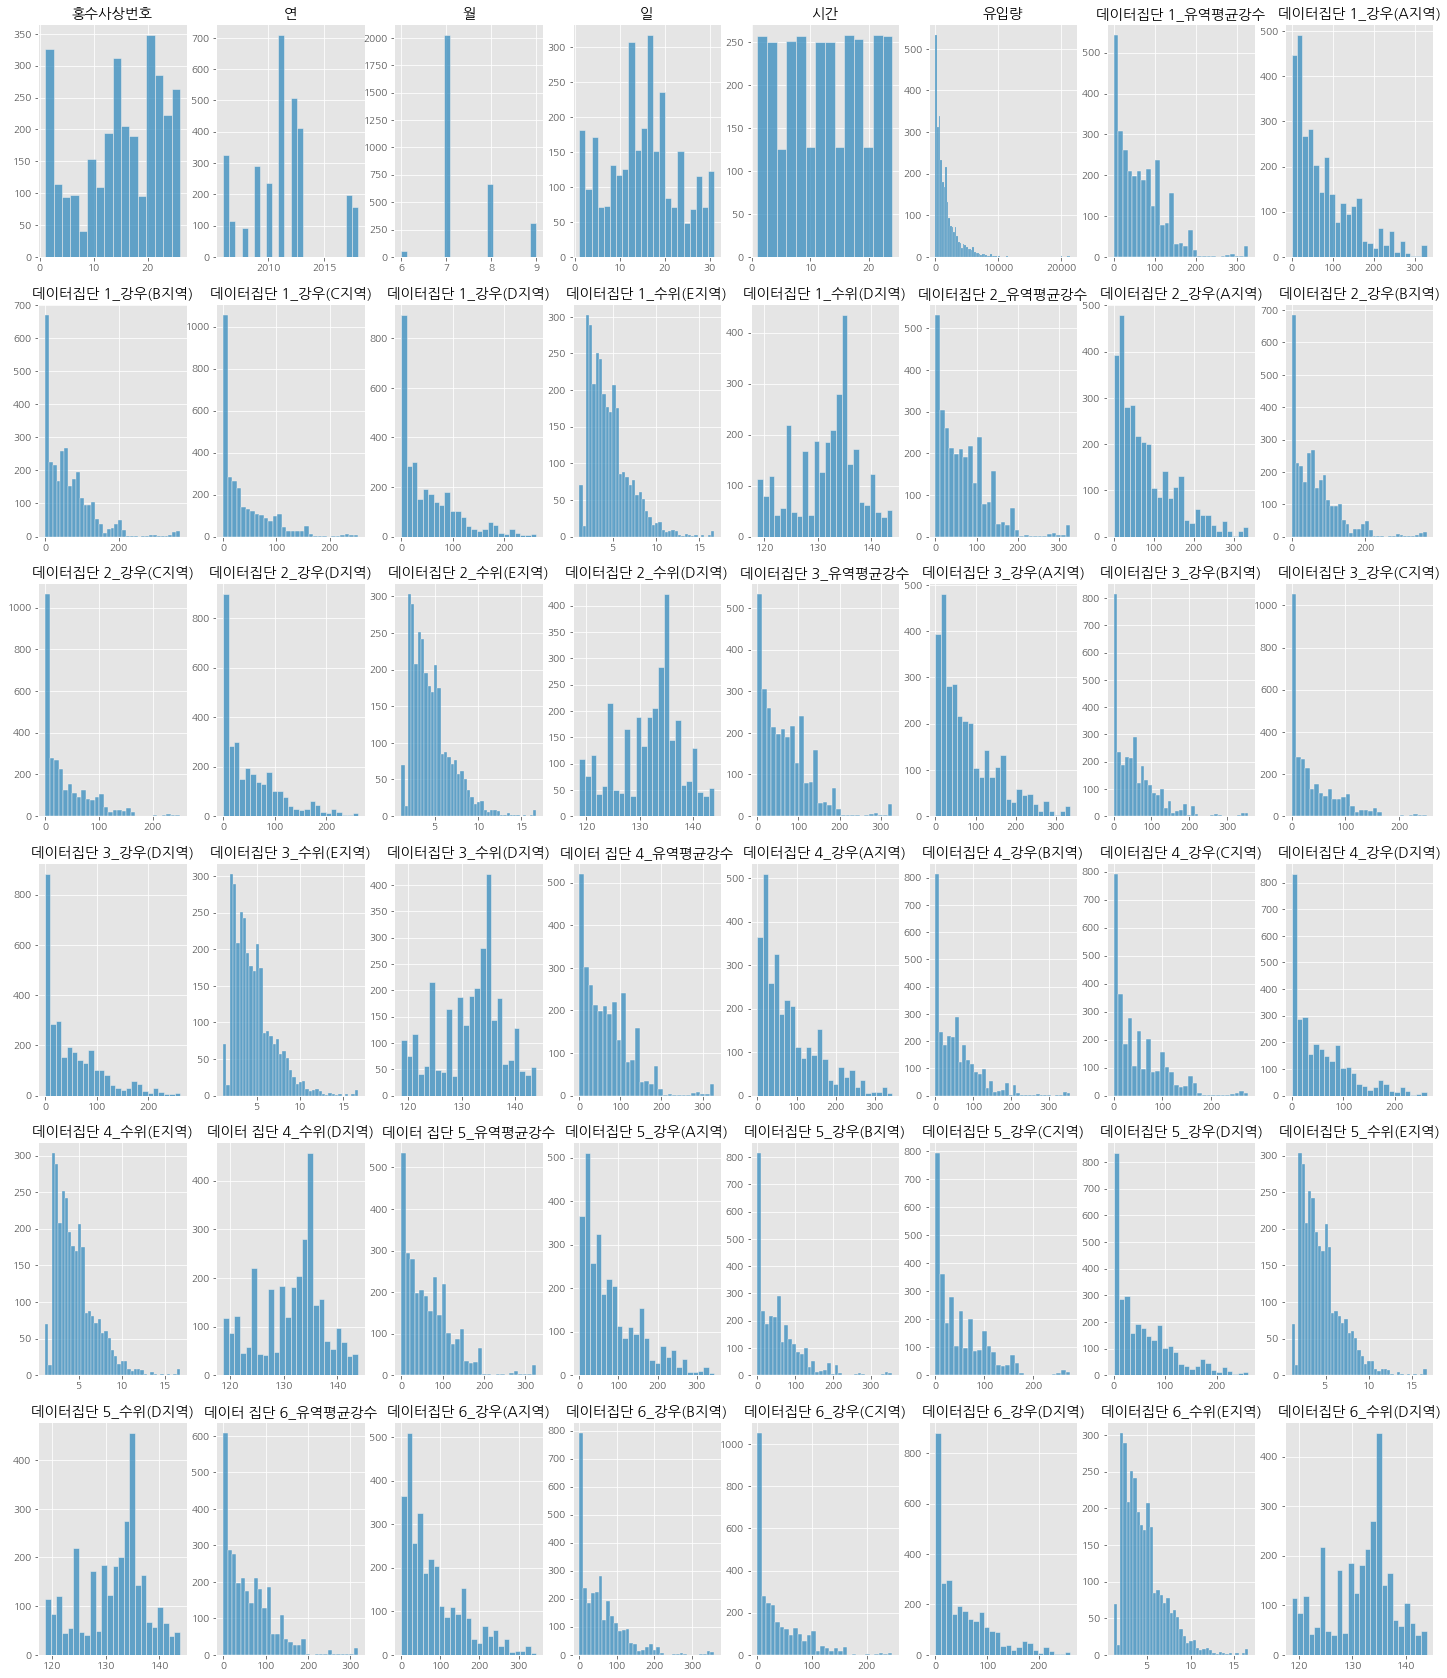

In [ ]:
# 변수별 Distribution
fig = plt.figure(figsize=(25,30))
for i, j in enumerate(data.columns):
  plt.subplot(6,8, i+1)
  sns.histplot(data[j])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(f'{j}')

In [ ]:
for i in data.select_dtypes(exclude='object'):
  if i in ['홍수사상번호', '유입량']:
    continue
  if data[i] > 0.5 or data[i] < -0.5:
    data[i] = np.log1p(data[i])

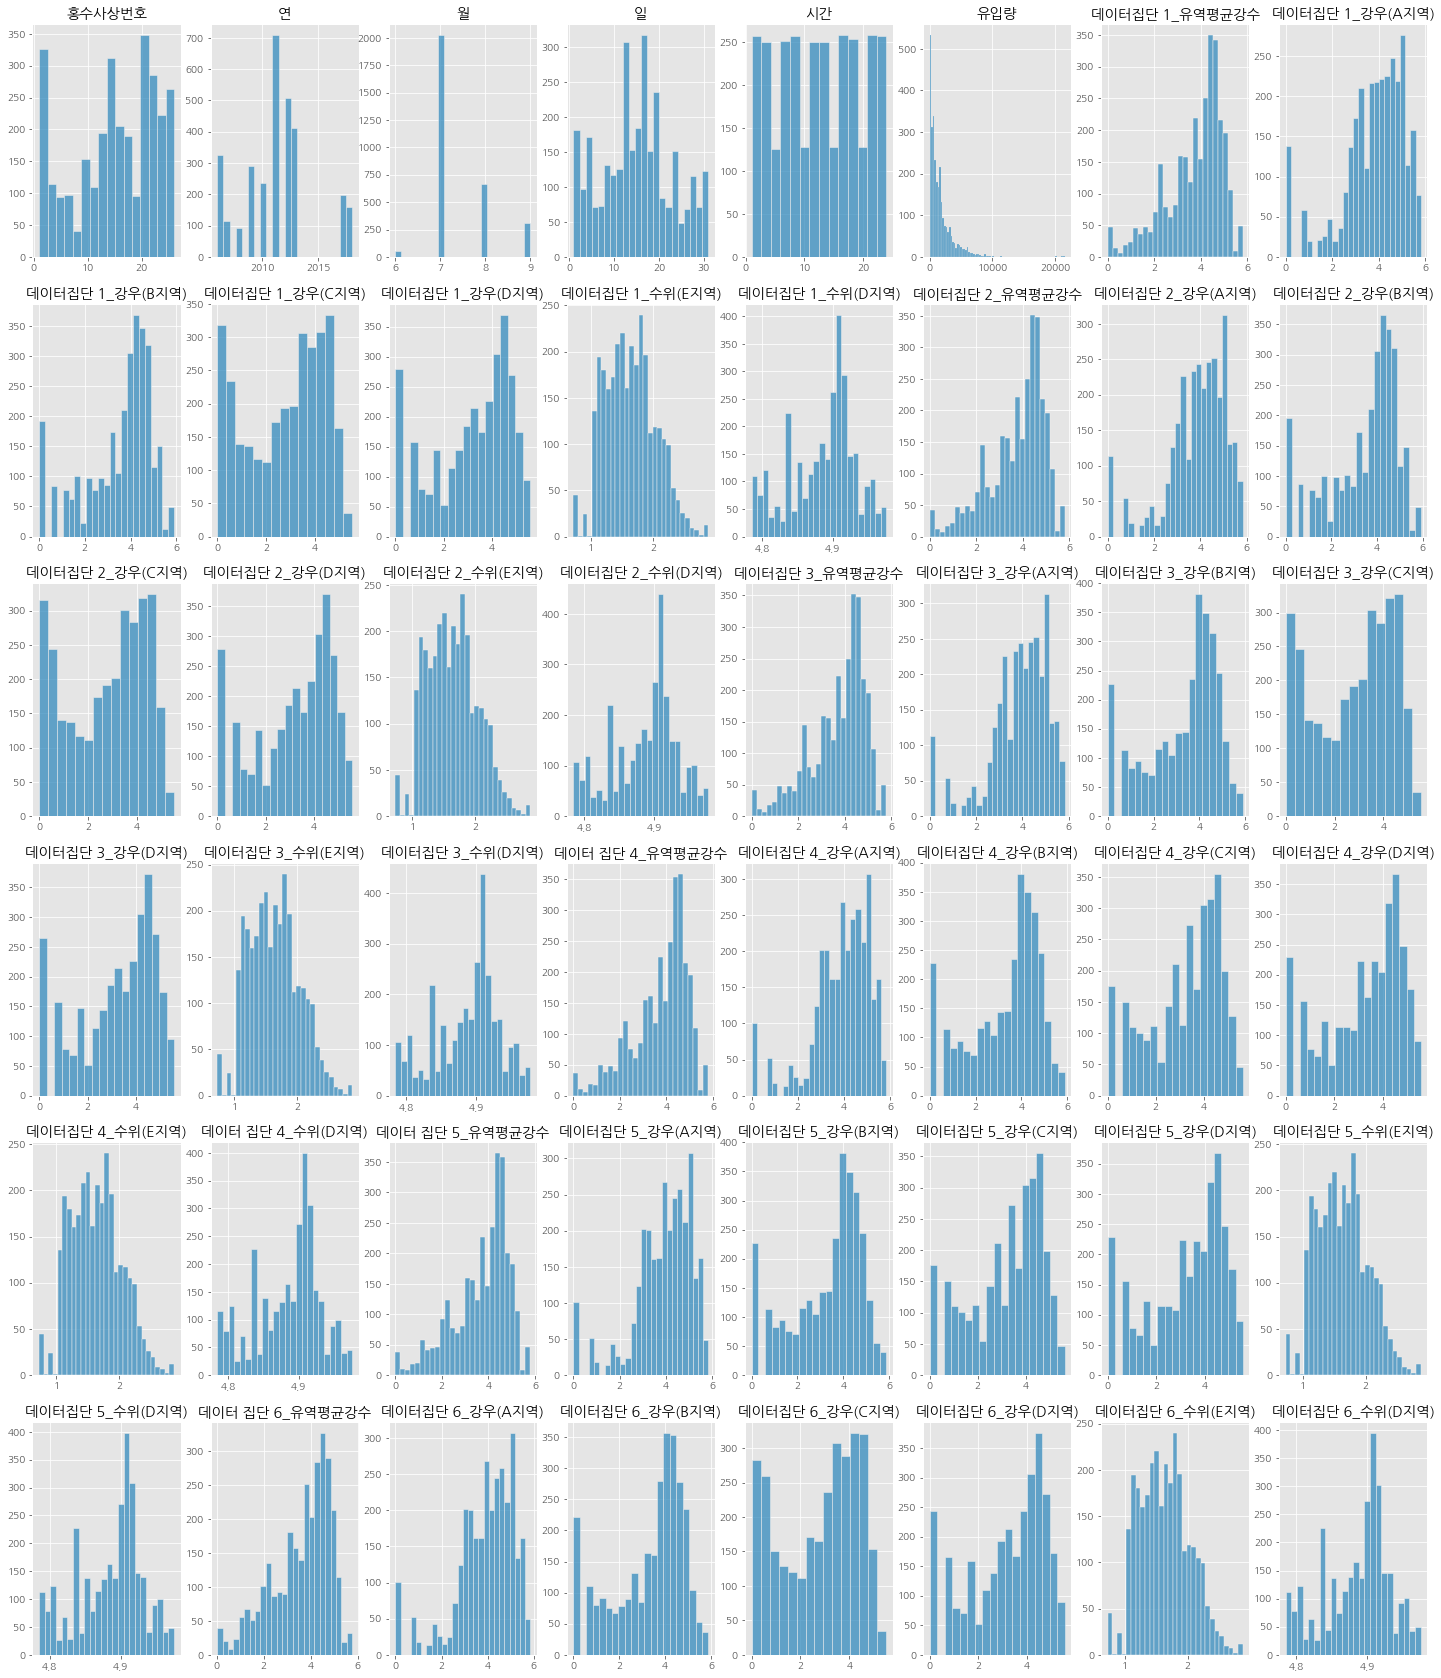

In [ ]:
fig = plt.figure(figsize=(25,30))
for i, j in enumerate(data.columns):
  plt.subplot(6,8, i+1)
  sns.histplot(data[j])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(f'{j}')

# train과 test로 나누기

In [ ]:
# data split
train = data.loc[data['유입량'].notnull()]
test = data.loc[data['유입량'].isnull()].drop(columns=['유입량'])
train.shape, test.shape

((2891, 48), (160, 47))

Text(0.5, 1.0, '연도별 월 분포')

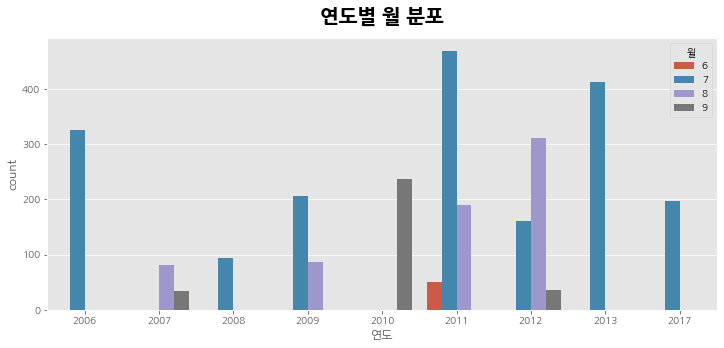

In [ ]:
count = train.groupby('연')['월'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.barplot(x=count['연'], y=count['count'], hue='월', data=count)
plt.xlabel('연도')
plt.title('연도별 월 분포', fontsize=20, pad=15, fontweight='bold')

시계열이지만 연도마다 비는 월(month)가 있다.
2006년 : 6,8,9 월 없음
2007년 : 6,7 월 없음
2008년 : 6,8,9 월 없음
2009년 : 6,9 월 없음
2010년 : 6,7,8 월 없음
2011년 : 9 월 없음
2012년 : 6 월 없음
2013년 : 6,8,9 월 없음
2017년 : 6 월 없음

Text(0.5, 0.98, '시계열 변수 vs target')

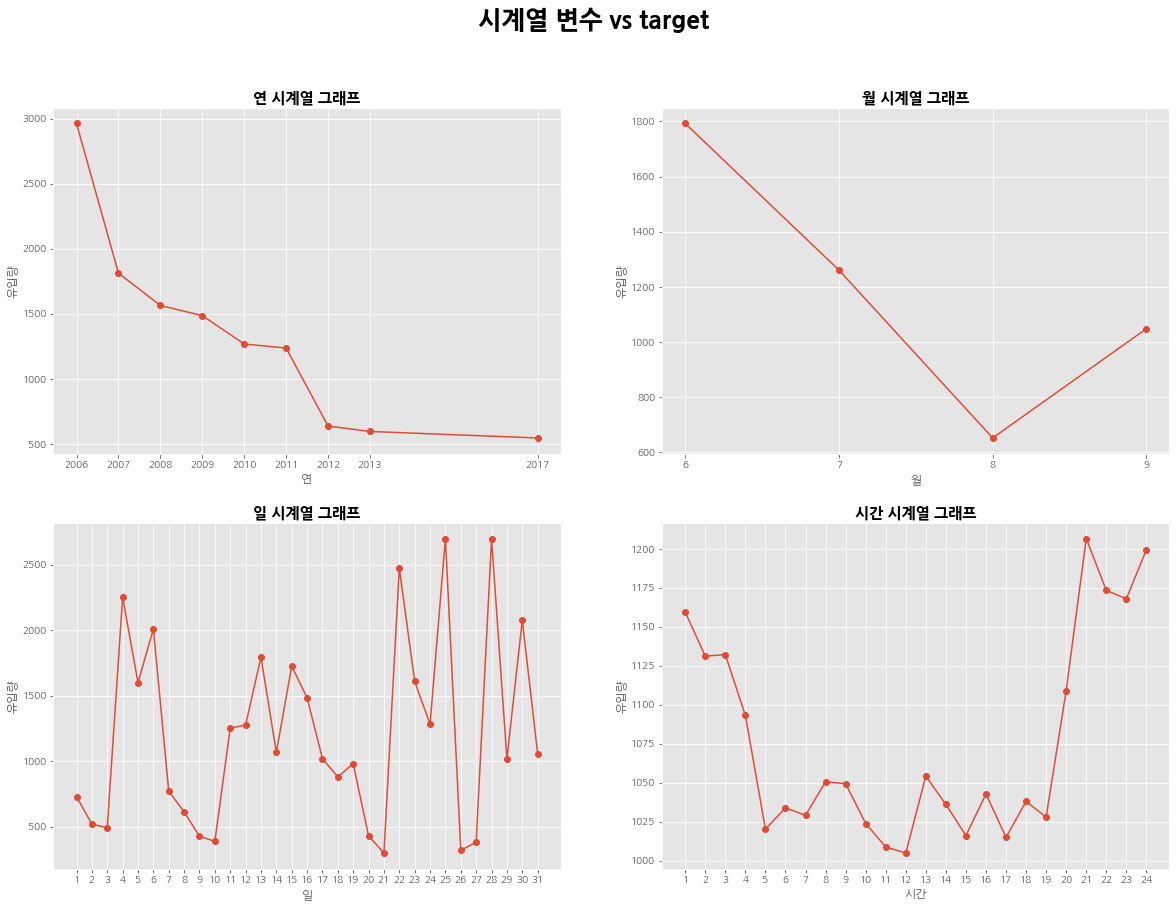

In [ ]:
fig = plt.figure(figsize=(20,14))
for j, i in enumerate(['연', '월', '일', '시간']):
  plt.subplot(2,2, j+1)
  plt.plot(train.groupby(i)['유입량'].median().index, train.groupby(i)['유입량'].median(), marker='o')
  plt.xticks(train.groupby(i)['유입량'].median().index)
  plt.xlabel(f'{i}')
  plt.ylabel('유입량')
  plt.title(f'{i} 시계열 그래프', fontsize=15, fontweight='bold')
plt.suptitle('시계열 변수 vs target', fontsize=25, fontweight='bold')

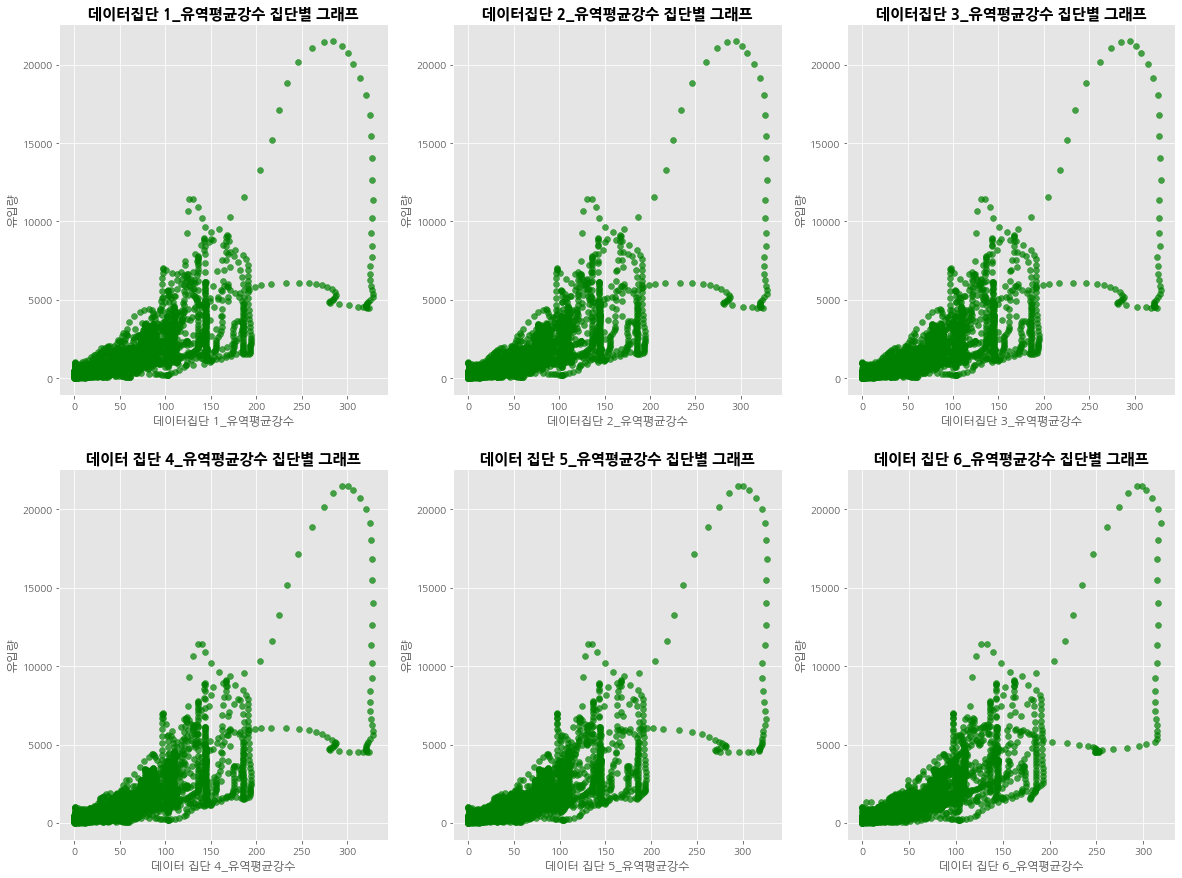

In [ ]:
rain = [i for i in train.columns if i.find('유역평균강수') != -1]

plt.figure(figsize=(20,15))
for j,i in enumerate(rain):
  plt.subplot(2,3, j+1)
  plt.scatter(train[i], train['유입량'], color='green', alpha=0.7)
  plt.xlabel(f'{i}')
  plt.ylabel('유입량')
  plt.title(f'{i} 집단별 그래프', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Train Set Correalation')

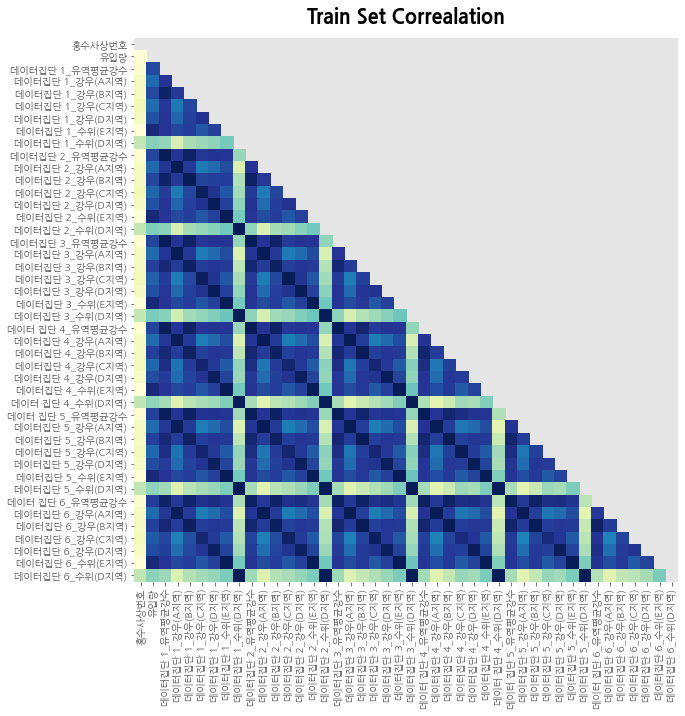

In [ ]:
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap='YlGnBu', cbar=False, square=True, mask=mask)
plt.title('Train Set Correalation', fontsize=20, pad=15, fontweight='bold')

* 집단별 강우의 상관계수가 너무 높다.
* 집단별 평균 유역평균 강수가 거의 같다. ==> pca를 해야한다.

In [ ]:
!pip install catboost
!pip install optuna
!pip install eli5

# Data Split(x_train, y_train) and scaling

In [ ]:
import catboost
import xgboost
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
x_train = train.drop(columns=['유입량'])
x_train_columns = x_train.columns
y_train = train['유입량']
x_test = test.copy()
x_test_columns = x_test.columns

In [ ]:
# scaling
ss = StandardScaler().fit(x_train)
x_train = pd.DataFrame(ss.transform(x_train), columns=x_train_columns)
x_test = pd.DataFrame(ss.transform(x_test), columns=x_test_columns)

# 하이퍼파라미터 튜닝(Optuna)

In [ ]:
cat_features = x_train.select_dtypes('object').columns
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 2000, 25000),
             'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.001,0.6),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,13),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,50),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              'grow_policy' : 'Depthwise'
               }
    model = catboost.CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [ ]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

# PCA전 모델(Catboost Regressor)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))

params_cat = {
    'iterations':study.best_params['iterations'],
    'loss_function':'RMSE',
    'task_type':"GPU",
    'eval_metric':'RMSE',
    'leaf_estimation_method':'Newton',
    'bootstrap_type': 'Bernoulli',
    'learning_rate' : study.best_params['learning_rate'],
    'reg_lambda': study.best_params['reg_lambda'],
    'subsample': study.best_params['subsample'],
    'random_strength': study.best_params['random_strength'],
    'depth': study.best_params['depth'],
    'min_data_in_leaf': study.best_params['min_data_in_leaf'],
    'leaf_estimation_iterations': study.best_params['leaf_estimation_iterations'],
    'grow_policy' : 'Depthwise'
}


for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor()
  model_cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid), early_stopping_rounds=70, verbose=100)

  preds += model_cat.predict(x_test) / kf.n_splits
  valid_preds = model_cat.predict(X_valid)
  print(f'{i+1}번째 RMSE:{np.sqrt(mean_squared_error(Y_valid, valid_preds))}')



Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.055201
0:	learn: 2121.4680121	test: 1723.4320183	best: 1723.4320183 (0)	total: 13.6ms	remaining: 13.6s
100:	learn: 318.4914336	test: 398.4228985	best: 398.4228985 (100)	total: 909ms	remaining: 8.09s
200:	learn: 195.1724118	test: 285.1752091	best: 285.1752091 (200)	total: 1.79s	remaining: 7.12s
300:	learn: 148.7951247	test: 242.2698611	best: 242.2698611 (300)	total: 2.66s	remaining: 6.17s
400:	learn: 123.1049990	test: 221.0769632	best: 221.0413736 (398)	total: 3.54s	remaining: 5.29s
500:	learn: 103.1997609	test: 206.1316773	best: 206.1316773 (500)	total: 4.45s	remaining: 4.43s
600:	learn: 89.1762593	test: 197.0299565	best: 197.0299565 (600)	total: 5.34s	remaining: 3.55s
700:	learn: 77.7280121	test: 191.1814701	best: 191.1814701 (700)	total: 6.23s	remaining: 2.66s
800:	learn: 69.7815160	test: 187.3879922	best: 187.3362222 (799)	total: 7.12s	remaining: 1.77s
900:	learn: 62.4242227	test: 184.1287668	best: 184.1185856 (899)	total: 8.02s	remaining: 881ms
999:	learn: 56

Text(0.5, 1.0, 'Preds vs True')

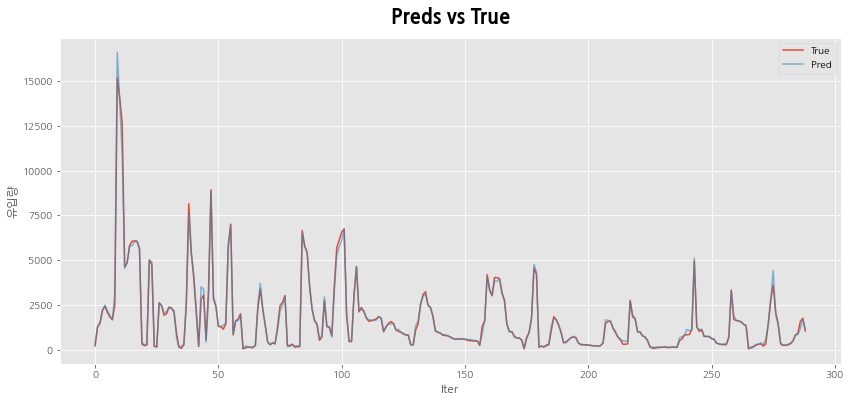

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=Y_valid.reset_index(drop=True), label='True')
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=valid_preds, label='Pred', alpha=0.6)
plt.xlabel('Iter')
plt.title('Preds vs True', fontsize=20, pad=15, fontweight='bold')

# overfitting 의심 된다.

---

# Lasso 모델(with optuna)

In [ ]:
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {'alpha':trial.suggest_loguniform('alpha',0.0001,1.0),
              'normalize':trial.suggest_categorical('normalize', [True, False]),
              'precompute':trial.suggest_categorical('precompute', [True, False]),
              'warm_start':trial.suggest_categorical('warm_start', [True, False]),
              'positive':trial.suggest_categorical('positive', [True, False]),
              'selection':trial.suggest_categorical('selection', ['cyclic', 'random']),
              'max_iter':trial.suggest_int('max_iter', 1000, 5000)
               }
    model = Lasso(**params)  
    model.fit(X_train,y_train)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [ ]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))



params = {
    'alpha':study.best_params['alpha'],
    'normalize':study.best_params['normalize'],
    'precompute':study.best_params['precompute'],
    'warm_start':study.best_params['warm_start'],
    'positive':study.best_params['positive'],
    'selection':study.best_params['selection'],
    'max_iter':study.best_params['max_iter']
}
for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_Lasso = Lasso(**params,)
  model_Lasso.fit(X_train, Y_train)

  preds += model_Lasso.predict(x_test) / kf.n_splits
  valid_preds = model_Lasso.predict(X_valid)
  print(f'{i+1}번째 RMSE:{np.sqrt(mean_squared_error(Y_valid, valid_preds))}')

1번째 RMSE:910.5739837617587
2번째 RMSE:1399.429743628547
3번째 RMSE:993.6402004341064
4번째 RMSE:1260.4171967591449
5번째 RMSE:992.3293578876767
6번째 RMSE:1289.968911311017
7번째 RMSE:1462.9275783726703
8번째 RMSE:1002.1027403995221
9번째 RMSE:1374.2405732262062
10번째 RMSE:1065.522521523867


Text(0.5, 1.0, 'Preds vs True')

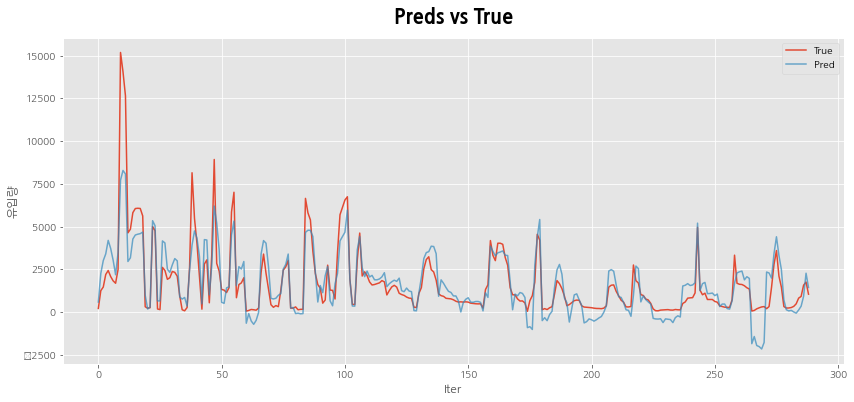

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=Y_valid.reset_index(drop=True), label='True')
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=valid_preds, label='Pred', alpha=0.7)
plt.xlabel('Iter')
plt.title('Preds vs True', fontsize=20, pad=15, fontweight='bold')

# PCA 이전 

In [ ]:
feature_importances = pd.DataFrame({'feature':x_train_columns, 'importance':model_cat.feature_importances_})

In [ ]:
def plot_feature_importance(df, n=10, threshold = None):

  df = df.sort_values('importance', ascending=False).reset_index(drop=True)

  df['importance_normalized'] = df['importance'] / df['importance'].sum()
  df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

  plt.rcParams['font.size'] = 12

  df.loc[:n, :].plot.barh(y='importance_normalized',
                          x='feature', color='darkgreen',
                          edgecolor='k', figsize=(12,8),
                          legend=False, linewidth=2)
  
  plt.xlabel('Normalized Importance', size=18)
  plt.ylabel('')
  plt.title(f'{n} Most Importance Features', size=18)
  plt.gca().invert_yaxis()

  if threshold:
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
  return df

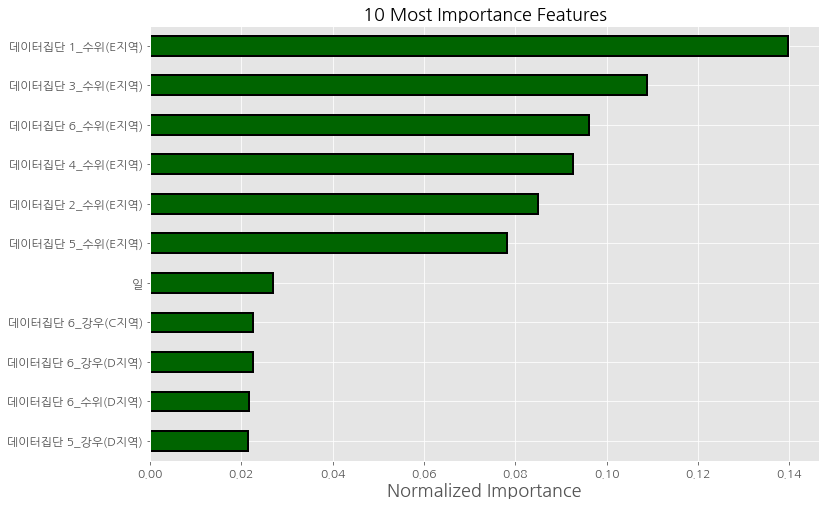

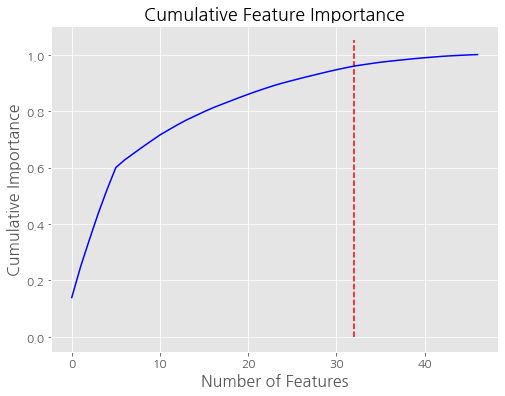

32 features required for 95% of cumulative importance.


In [ ]:
norm_fi = plot_feature_importance(feature_importances, threshold=0.95)

# PCA 전 누적기여율 확인 ==> components 3개

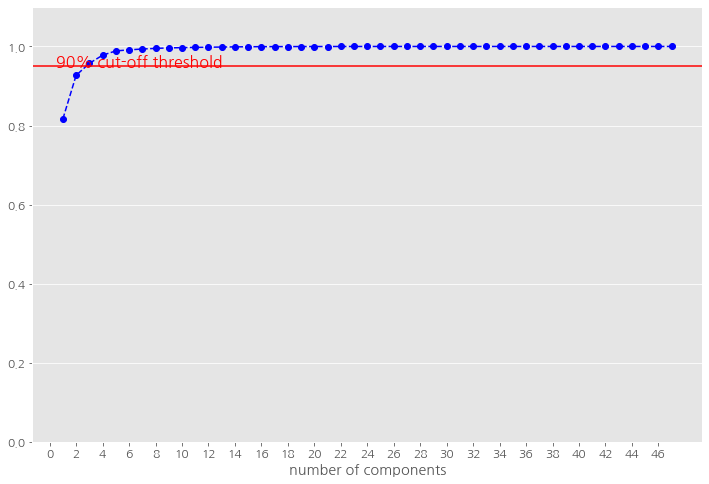

In [ ]:
pca = PCA(svd_solver='auto', whiten=True)
pca.fit(x_train)

fig, ax = plt.subplots(figsize=(12,8))
xi = np.arange(1, len(x_train.columns)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('number of components')
plt.xticks(np.arange(0, len(x_train.columns), step=2))

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '90% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

# PCA 이후 모델링(Catboost Regressor)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,svd_solver='auto', whiten=True)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
ss = StandardScaler().fit(x_train)
x_train = pd.DataFrame(ss.transform(x_train))
x_test = pd.DataFrame(ss.transform(x_test))

In [ ]:
cat_features = x_train.select_dtypes('object').columns
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 2000, 25000),
             'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.001,0.6),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,13),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,50),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              'grow_policy' : 'Depthwise'
               }
    model = catboost.CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [ ]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))

params_cat = {
    'iterations':study.best_params['iterations'],
    'loss_function':'RMSE',
    'task_type':"GPU",
    'eval_metric':'RMSE',
    'leaf_estimation_method':'Newton',
    'bootstrap_type': 'Bernoulli',
    'learning_rate' : study.best_params['learning_rate'],
    'reg_lambda': study.best_params['reg_lambda'],
    'subsample': study.best_params['subsample'],
    'random_strength': study.best_params['random_strength'],
    'depth': study.best_params['depth'],
    'min_data_in_leaf': study.best_params['min_data_in_leaf'],
    'leaf_estimation_iterations': study.best_params['leaf_estimation_iterations'],
    'grow_policy' : 'Depthwise'
}


for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(**params_cat)
  model_cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid), early_stopping_rounds=70, verbose=100)

  preds += model_cat.predict(x_test) / kf.n_splits
  valid_preds = model_cat.predict(X_valid)
  print(f'{i+1}번째 RMSE:{np.sqrt(mean_squared_error(Y_valid, valid_preds))}')

0:	learn: 2151.2971930	test: 1759.4298763	best: 1759.4298763 (0)	total: 27.6ms	remaining: 4m 30s
100:	learn: 552.8511900	test: 898.0529437	best: 898.0529437 (100)	total: 2.16s	remaining: 3m 27s
200:	learn: 500.6860038	test: 885.7420812	best: 885.7420812 (200)	total: 3.61s	remaining: 2m 52s
bestTest = 885.2386392
bestIteration = 207
Shrink model to first 208 iterations.
1번째 RMSE:885.2386863974517
0:	learn: 2071.8299427	test: 2467.0592611	best: 2467.0592611 (0)	total: 18.5ms	remaining: 3m 1s
100:	learn: 531.1244522	test: 841.8862986	best: 841.8862986 (100)	total: 1.66s	remaining: 2m 39s
200:	learn: 463.2791719	test: 813.8939509	best: 813.8939509 (200)	total: 3.11s	remaining: 2m 28s
300:	learn: 439.3639733	test: 810.0232984	best: 808.4706225 (293)	total: 4.55s	remaining: 2m 23s
400:	learn: 427.2156857	test: 805.7951348	best: 805.6153787 (399)	total: 6.04s	remaining: 2m 21s
500:	learn: 419.9679355	test: 804.7901229	best: 804.2442088 (463)	total: 7.59s	remaining: 2m 20s
600:	learn: 415.2151

Text(0.5, 1.0, 'Preds vs True')

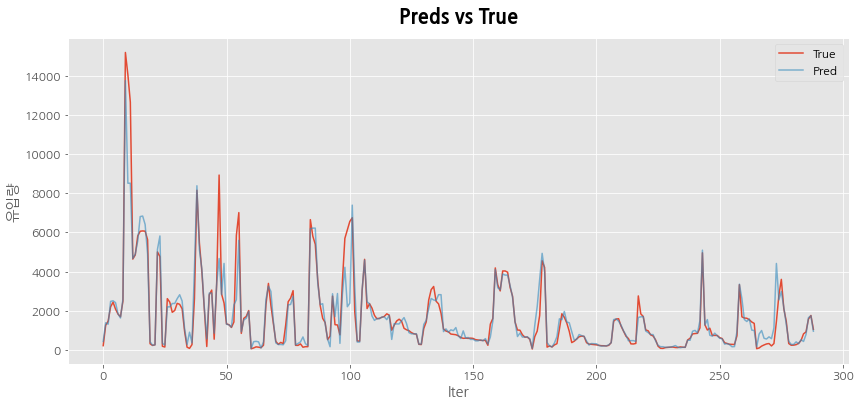

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=Y_valid.reset_index(drop=True), label='True')
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=valid_preds, label='Pred', alpha=0.6)
plt.xlabel('Iter')
plt.title('Preds vs True', fontsize=20, pad=15, fontweight='bold')

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))



params = {
    'alpha':study.best_params['alpha'],
    'normalize':study.best_params['normalize'],
    'precompute':study.best_params['precompute'],
    'warm_start':study.best_params['warm_start'],
    'positive':study.best_params['positive'],
    'selection':study.best_params['selection'],
    'max_iter':study.best_params['max_iter']
}
for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_Lasso = Lasso(**params)
  model_Lasso.fit(X_train, Y_train)

  preds += model_Lasso.predict(x_test) / kf.n_splits
  valid_preds = model_Lasso.predict(X_valid)
  print(f'{i+1}번째 RMSE:{np.sqrt(mean_squared_error(Y_valid, valid_preds))}')

1번째 RMSE:1099.1267340589557
2번째 RMSE:1676.020331236447
3번째 RMSE:1094.8613536085234
4번째 RMSE:1446.0636729834382
5번째 RMSE:1118.0127459754988
6번째 RMSE:1500.9165655245172
7번째 RMSE:1688.5673748305744
8번째 RMSE:1192.7610098668508
9번째 RMSE:1593.7901676706479
10번째 RMSE:1235.2090547437676


Text(0.5, 1.0, 'Preds vs True')

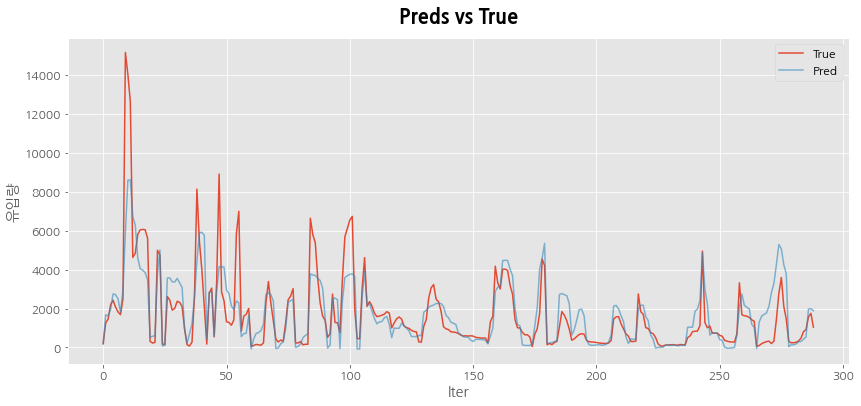

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=Y_valid.reset_index(drop=True), label='True')
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=valid_preds, label='Pred', alpha=0.6)
plt.xlabel('Iter')
plt.title('Preds vs True', fontsize=20, pad=15, fontweight='bold')

# Submission

In [ ]:
submit=pd.read_excel('/content/drive/MyDrive/dataset/빅콘테스트/데이터분석분야_퓨처스리그_홍수ZERO_데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_평가데이터_210803.xlsx')
submit = submit.drop(index=[0])
submit['유입량'] = preds
submit

,NO,홍수사상번호,연,월,일,시간,유입량
1,1.0,26.0,2018.0,7.0,1.0,6.0,769.360223
2,2.0,26.0,2018.0,7.0,1.0,7.0,675.088893
3,3.0,26.0,2018.0,7.0,1.0,8.0,648.467089
4,4.0,26.0,2018.0,7.0,1.0,9.0,726.066243
5,5.0,26.0,2018.0,7.0,1.0,10.0,552.060600
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,815.476983
157,157.0,26.0,2018.0,7.0,7.0,18.0,815.476983
158,158.0,26.0,2018.0,7.0,7.0,19.0,815.476983
159,159.0,26.0,2018.0,7.0,7.0,20.0,815.476983


In [ ]:
submit.to_csv('/content/drive/MyDrive/.submit.csv')

# PCA 더 자세히 알고가기 

흔히, PCA 알고리즘을 차원축소 알고리즘으로 알고있다.

그렇기 때문에 면접때 PCA를 왜 사용했냐고 물어봤을때,

단순히 차원을 축소하기 위해서 썻다고 답변하는 경우가 허다하다.

(이 답변은 30점 정도 줄 수 있는 답변이다.)

 

PCA를 사용하면 다중공선성 문제, 차원의 저주 문제를 해결할 수 있고,

차원을 축소해주기때문에 사람이 쉽게 관찰하고 이해할 수 있는 2차원으로 데이터들을 보여줄 수 있기때문에

사용했다고 답변해야 좋은 답변이라 할 수 있다.

 

PCA는 어떤 알고리즘인가?

PCA는 차원축소 알고리즘으로 생각하기보다는 기존 변수를 조합해 새로운 변수를 만드는 변수 추출(Feature Extraction)기법 이라고 알고있으면 좋다. 이때, 변수 선택(Feature Selection) 기법과 용어가 헷갈릴 수 있는데

1) 변수 선택(Feature Selection) : 있는 변수 중 결과값을 잘 표현할 수 있는 변수를 (있는 변수들 중에서) 단순히 고르는것

2) 변수 추출(Feature Extraction) : 변수들을 조합해 새로운 변수를 만들어 결과값을 잘 표현하는 방법

좀 더 스마트하게 PCA 알고리즘을 설명해보면, 기존의 변수들을 선형 결합(linear combination)하여 새로운 변수를 만들어 내는 기법이라고 할 수 있겠다.